In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
# provider = IBMQ.get_provider("ibm-q")
provider = IBMQ.get_provider(hub='ibm-q-education', group='yale-uni-2', project='cpsc647-quantum')
# device = provider.get_backend('ibmq_lima') #run on ibmq_lima (5-qbit QC)

In [2]:
device_names =  ['ibmq_lima', 'ibmq_bogota', 'ibmq_santiago', 'ibmq_manila', 'ibmq_quito', 'ibmq_belem', 'ibmq_casablanca', 'ibmq_jakarta', 'ibm_lagos', 'ibm_perth'  ]
# device_names =  ['ibmq_lima', 'ibmq_bogota', 'ibmq_santiago', 'ibmq_manila', 'ibmq_quito', 'ibmq_belem']
device = [0]*len(device_names)
for i in range(len(device_names)):
    device[i] = provider.get_backend(device_names[i])
    print("Device", i , "=", device[i])


Device 0 = ibmq_lima
Device 1 = ibmq_bogota
Device 2 = ibmq_santiago
Device 3 = ibmq_manila
Device 4 = ibmq_quito
Device 5 = ibmq_belem
Device 6 = ibmq_casablanca
Device 7 = ibmq_jakarta
Device 8 = ibm_lagos
Device 9 = ibm_perth


In [3]:
qnn_circuit = """
OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
ry(0.5) q[0];
ry(0.5) q[1];
ry(0.5) q[2];
ry(0.5) q[3];
rz(0.5) q[0];
rz(0.5) q[1];
rz(0.5) q[2];
rz(0.5) q[3];
rx(0.5) q[0];
rx(0.5) q[1];
rx(0.5) q[2];
rx(0.5) q[3];
ry(0.5) q[0];
ry(0.5) q[1];
ry(0.5) q[2];
ry(0.5) q[3];
u3(2.4018686,2.6075468,-0.73598874) q[0];
u3(2.8859026,-0.68833423,0.63394415) q[1];
u3(-1.5295002,1.8450029,2.7694488) q[2];
u3(-2.3047609,2.7306604,0.5879783) q[3];
cu3(2.3210366,0.4254677,1.5148387) q[0],q[1];
cu3(-0.44356465,2.4218092,0.46435541) q[1],q[2];
cu3(-1.4666209,0.80078667,-1.4474468) q[2],q[3];
cu3(-0.36842355,-1.275984,2.0840414) q[3],q[0];
u3(-2.4798796,-1.4483067,-0.88710642) q[0];
u3(-1.8889532,0.29651332,-3.1028855) q[1];
u3(2.8372009,-2.6686833,2.4253955) q[2];
u3(0.52282119,-1.0200894,1.9413471) q[3];
cu3(0.48961964,2.5382919,0.34343794) q[0],q[1];
cu3(-0.9907741,0.84409469,-0.85193533) q[1],q[2];
cu3(1.322163,2.8048835,1.8160276) q[2],q[3];
cu3(-1.3734181,1.8135304,0.56211334) q[3],q[0];
u3(1.5954108,-1.9148166,-3.1098893) q[0];
u3(-1.2137874,-2.4096735,2.5777991) q[1];
u3(0.90487719,1.3012903,0.99356383) q[2];
u3(-0.054651063,2.4586365,-2.2321444) q[3];
cu3(0.19780637,-2.1442633,0.96871638) q[0],q[1];
cu3(-1.0819089,0.96263516,-0.65452409) q[1],q[2];
cu3(2.6056113,-1.862028,-1.8736396) q[2],q[3];
cu3(-1.8737527,2.8256829,1.0469393) q[3],q[0];
u3(3.0229998,-2.5926819,-3.1160707) q[0];
u3(-2.4578683,-2.1133151,1.2724712) q[1];
u3(1.1249285,2.6104259,-1.6223981) q[2];
u3(-2.1416609,1.6668605,-1.2698458) q[3];
cu3(1.9067074,-0.74550194,1.7971354) q[0],q[1];
cu3(-2.440917,-1.585404,0.95779765) q[1],q[2];
cu3(0.66415638,-0.80097657,1.8726075) q[2],q[3];
cu3(2.1356838,-2.2781994,-1.6771964) q[3],q[0];
"""

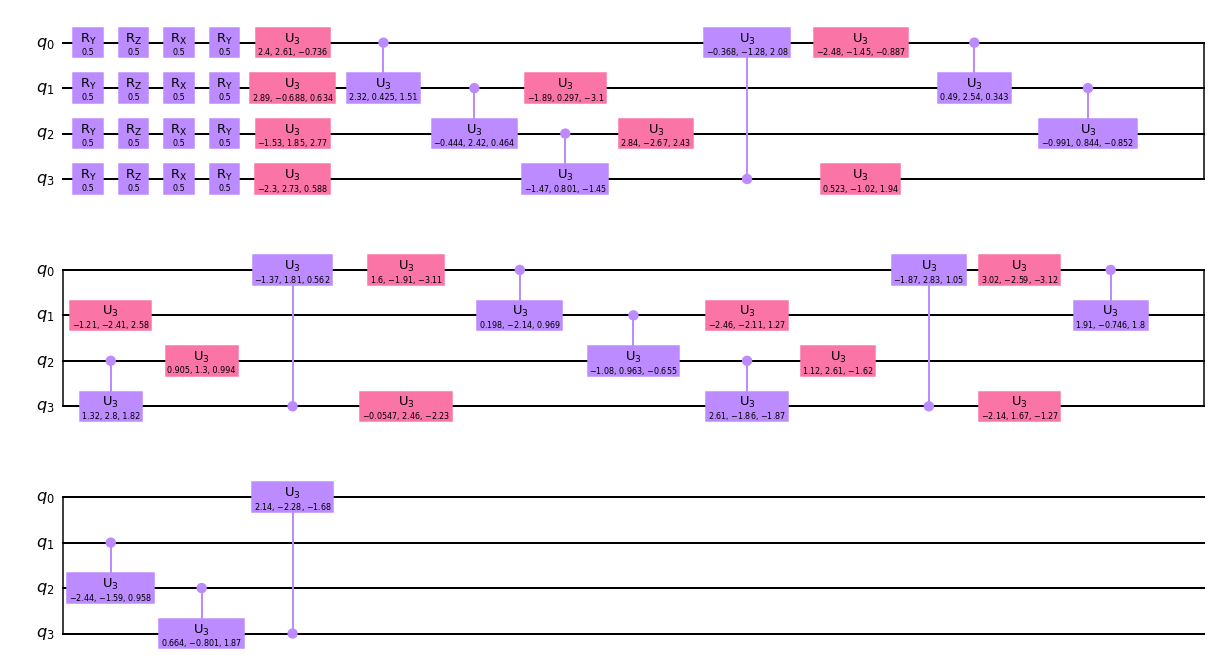

In [4]:
qnn_circ = QuantumCircuit.from_qasm_str(qnn_circuit)
# qnn_circ.measure_all()
qnn_circ.draw('mpl')